# ASSIGNMENT

## 771768 - Introduction to Programming for Artificial Intelligence and Data Science

## Customer DATA PRE-PROCESSING

### The use of List and Dictionary Comprehension is the prefered method used throughout this notebook for iterating purposes except where inapplicable.

## EXERCISE 1.

In [1]:
import csv

In [2]:
# ', '.join removes the ugly square brackets in each row for better visuals.
with open ('acw_user_data.csv') as acw_file:
    csv_reader=csv.reader(acw_file)
    for line in csv_reader:
         print(', '.join(line))

Address Street, Address City, Address Postcode, Age (Years), Distance Commuted to Work (miles), Employer Company, Credit Card Start Date, Credit Card Expiry Date, Credit Card Number, Credit Card CVV, Dependants, First Name, Bank IBAN, Last Name, Marital Status, Yearly Pension (Â£), Retired, Yearly Salary (Â£), Sex, Vehicle Make, Vehicle Model, Vehicle Year, Vehicle Type
70 Lydia isle, Lake Conor, S71 7XZ, 89, 0, N/A, 08/18, 11/27, 676373692463, 875, 3, Kieran, GB62PQKB71416034141571, Wilson, married or civil partner, 7257, True, 72838, Male, Hyundai, Bonneville, 2009, Pickup
00 Wheeler wells, Chapmanton, L2 7BT, 46, 13.72, Begum-Williams, 08/12, 11/26, 4529436854129855, 583, 1, Jonathan, GB37UMCO54540228728019, Thomas, married or civil partner, 0, False, 54016, Male, Nissan, ATS, 1996, Coupe
Studio 33K Joel walk, Randallborough, ME3N 1GH, 22, 16.02, Hill-Wright, 11/19, 07/27, 4091726363083888495, 422, 1, Antony, GB40CVUE84011545859591, Jones, married or civil partner, 0, False, 68049, 

# 

## EXERCISE 2.

In [3]:
# The DictReader class basically creates a CSV object that behaves like a Python OrderedDict.
#It works by reading in the first line of the CSV and using each comma separated value in this line as a dictionary key

acw_data=[]
with open ('acw_user_data.csv') as file:
    csv_dict=csv.DictReader(file)
    for i in csv_dict:
        acw_data.append(i)
# printing the first 5 rows
acw_data[:5]

[{'Address Street': '70 Lydia isle',
  'Address City': 'Lake Conor',
  'Address Postcode': 'S71 7XZ',
  'Age (Years)': '89',
  'Distance Commuted to Work (miles)': '0',
  'Employer Company': 'N/A',
  'Credit Card Start Date': '08/18',
  'Credit Card Expiry Date': '11/27',
  'Credit Card Number': '676373692463',
  'Credit Card CVV': '875',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Bank IBAN': 'GB62PQKB71416034141571',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (Â£)': '7257',
  'Retired': 'True',
  'Yearly Salary (Â£)': '72838',
  'Sex': 'Male',
  'Vehicle Make': 'Hyundai',
  'Vehicle Model': 'Bonneville',
  'Vehicle Year': '2009',
  'Vehicle Type': 'Pickup'},
 {'Address Street': '00 Wheeler wells',
  'Address City': 'Chapmanton',
  'Address Postcode': 'L2 7BT',
  'Age (Years)': '46',
  'Distance Commuted to Work (miles)': '13.72',
  'Employer Company': 'Begum-Williams',
  'Credit Card Start Date': '08/12',
  'Credit Card Expiry Dat

In [4]:
# Let's define 2 functions that will help us cast the 'Retired' and Dependants' column- which will give us error if we don't- to their respective data types.

def to_bool(value):
    return True if value=='True' else False
def to_int(value):
    return None if value.strip()=='' else int(value)
    
# Converting all flat structures into nested structures we have:

vehicles = {('Vehicle Make', str), ('Vehicle Model', str), ('Vehicle Year', int), ('Vehicle Type', str)}
credit_card = {('Credit Card Start Date', str), ('Credit Card Expiry Date', str), ('Credit Card Number', str), ('Credit Card CVV', int), ('Bank IBAN', str)}
address = {('Address Street', str), ('Address City', str), ('Address Postcode', str)}
work_details= {('Yearly Pension (Â£)', int), ('Retired', to_bool), ('Yearly Salary (Â£)', int), ('Distance Commuted to Work (miles)', float), ('Employer Company', str)}
personal_details= {('Age (Years)', int),  ('Dependants', to_int), ('First Name', str), ('Last Name', str), ('Marital Status',str), ('Sex', str)}



In [5]:
# Lets define another function that will get the attribute and the data type of each nested structure.

def get_attr(header):
    return {attr:dtype(row[attr]) for attr, dtype in header}

acw_processed_data = []
for row in acw_data:
    keys = {
            'Address':get_attr(address),
            'Personal Details':get_attr(personal_details),
            'Credit Card':get_attr(credit_card),
            'Work Details':get_attr(work_details),
            'Vehicle':get_attr(vehicles)
    }

    acw_processed_data.append(keys)
# lets print the first 3 rows
acw_processed_data[:3]

[{'Address': {'Address Postcode': 'S71 7XZ',
   'Address City': 'Lake Conor',
   'Address Street': '70 Lydia isle'},
  'Personal Details': {'Marital Status': 'married or civil partner',
   'Sex': 'Male',
   'Last Name': 'Wilson',
   'First Name': 'Kieran',
   'Age (Years)': 89,
   'Dependants': 3},
  'Credit Card': {'Bank IBAN': 'GB62PQKB71416034141571',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Start Date': '08/18',
   'Credit Card Number': '676373692463',
   'Credit Card CVV': 875},
  'Work Details': {'Yearly Pension (Â£)': 7257,
   'Retired': True,
   'Yearly Salary (Â£)': 72838,
   'Distance Commuted to Work (miles)': 0.0,
   'Employer Company': 'N/A'},
  'Vehicle': {'Vehicle Year': 2009,
   'Vehicle Type': 'Pickup',
   'Vehicle Model': 'Bonneville',
   'Vehicle Make': 'Hyundai'}},
 {'Address': {'Address Postcode': 'L2 7BT',
   'Address City': 'Chapmanton',
   'Address Street': '00 Wheeler wells'},
  'Personal Details': {'Marital Status': 'married or civil partner',
  

# 

# EXERCISE 3.

In [6]:
dependent_error_column = [row_number for row_number, row in enumerate(acw_processed_data,2) if row['Personal Details']['Dependants'] is None]

# Using F-Strings which allows us to directly insert variables into strings for the purpose of display, without having to worry about concatenation.

print(f"Problematic rows for dependants: {dependent_error_column}")

Problematic rows for dependants: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]


# 


# EXERCISE 4.

In [7]:
import json

with open('processed.json', 'w') as json_file: # context manager
    json.dump(acw_processed_data, json_file)

# 

# EXERCISE 5.

In [8]:
retired_customers= [row for row in acw_processed_data if row['Work Details']['Retired']]
employed_customers = [row for row in acw_processed_data if not row['Work Details']['Retired']]

In [9]:
# To confirm lets print the first 2 rows

retired_customers[:2]

[{'Address': {'Address Postcode': 'S71 7XZ',
   'Address City': 'Lake Conor',
   'Address Street': '70 Lydia isle'},
  'Personal Details': {'Marital Status': 'married or civil partner',
   'Sex': 'Male',
   'Last Name': 'Wilson',
   'First Name': 'Kieran',
   'Age (Years)': 89,
   'Dependants': 3},
  'Credit Card': {'Bank IBAN': 'GB62PQKB71416034141571',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Start Date': '08/18',
   'Credit Card Number': '676373692463',
   'Credit Card CVV': 875},
  'Work Details': {'Yearly Pension (Â£)': 7257,
   'Retired': True,
   'Yearly Salary (Â£)': 72838,
   'Distance Commuted to Work (miles)': 0.0,
   'Employer Company': 'N/A'},
  'Vehicle': {'Vehicle Year': 2009,
   'Vehicle Type': 'Pickup',
   'Vehicle Model': 'Bonneville',
   'Vehicle Make': 'Hyundai'}},
 {'Address': {'Address Postcode': 'G3 7ZX',
   'Address City': 'Griffinstad',
   'Address Street': '81 Goodwin dam'},
  'Personal Details': {'Marital Status': 'single',
   'Sex': 'Male',
   

In [10]:
employed_customers[:2]

[{'Address': {'Address Postcode': 'L2 7BT',
   'Address City': 'Chapmanton',
   'Address Street': '00 Wheeler wells'},
  'Personal Details': {'Marital Status': 'married or civil partner',
   'Sex': 'Male',
   'Last Name': 'Thomas',
   'First Name': 'Jonathan',
   'Age (Years)': 46,
   'Dependants': 1},
  'Credit Card': {'Bank IBAN': 'GB37UMCO54540228728019',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Start Date': '08/12',
   'Credit Card Number': '4529436854129855',
   'Credit Card CVV': 583},
  'Work Details': {'Yearly Pension (Â£)': 0,
   'Retired': False,
   'Yearly Salary (Â£)': 54016,
   'Distance Commuted to Work (miles)': 13.72,
   'Employer Company': 'Begum-Williams'},
  'Vehicle': {'Vehicle Year': 1996,
   'Vehicle Type': 'Coupe',
   'Vehicle Model': 'ATS',
   'Vehicle Make': 'Nissan'}},
 {'Address': {'Address Postcode': 'ME3N 1GH',
   'Address City': 'Randallborough',
   'Address Street': 'Studio 33K Joel walk'},
  'Personal Details': {'Marital Status': 'married o

In [11]:
with open('retired.json', 'w') as retired_file:
    json.dump(retired_customers, retired_file)

In [12]:
with open('employed.json','w') as employed_file:
    json.dump(employed_customers, employed_file)

# 

# EXERCISE 6.

In [13]:
# Lets define a function that will check the cc start and expiry date and substract them

def valid_cc(line):
    end_date= line['Credit Card']['Credit Card Expiry Date'][-2:]
    start_date= line['Credit Card']['Credit Card Start Date'][-2:]
    return int(end_date) - int(start_date)> 10

remove_ccard = [row for row in acw_processed_data if valid_cc(row)]


In [14]:
with open('remove_ccard.json', 'w') as json_file:
    json.dump(remove_ccard, json_file)

# 

# EXERCISE 7A.

In [15]:
def salary_commute(line):
    salary = line['Work Details']['Yearly Salary (Â£)']
    commute = line['Work Details']['Distance Commuted to Work (miles)']
    
    if commute <=1:
        return salary
    else:
        return round(salary/commute,2)

for row in acw_processed_data:
    row['Work Details']['Salary Commute'] = salary_commute(row)

# EXERCISE 7B.

In [16]:
# Using Lambda anonymous function

sort_row =lambda row:row['Work Details']['Salary Commute']
acw_processed_data.sort(key=(sort_row))
acw_processed_data[:2]

[{'Address': {'Address Postcode': 'E27 9GY',
   'Address City': 'South Ryan',
   'Address Street': 'Studio 9 Reid lights'},
  'Personal Details': {'Marital Status': 'single',
   'Sex': 'Male',
   'Last Name': 'Jackson',
   'First Name': 'Graeme',
   'Age (Years)': 52,
   'Dependants': 2},
  'Credit Card': {'Bank IBAN': 'GB09ELJH35362236053720',
   'Credit Card Expiry Date': '04/29',
   'Credit Card Start Date': '06/14',
   'Credit Card Number': '4713424668774153',
   'Credit Card CVV': 3053},
  'Work Details': {'Yearly Pension (Â£)': 0,
   'Retired': False,
   'Yearly Salary (Â£)': 17046,
   'Distance Commuted to Work (miles)': 5.52,
   'Employer Company': 'Smith, Birch and Burke',
   'Salary Commute': 3088.04},
  'Vehicle': {'Vehicle Year': 2011,
   'Vehicle Type': 'SUV',
   'Vehicle Model': 'Rally Wagon 1500',
   'Vehicle Make': 'Chevrolet'}},
 {'Address': {'Address Postcode': 'G7H 8FA',
   'Address City': 'Louisland',
   'Address Street': 'Studio 34r Wilkinson camp'},
  'Personal De

# EXERCISE 7C.

In [17]:
with open('commute.json', 'w') as commute_file:
    json.dump(acw_processed_data, commute_file)

# 

# DATA VISUALISATION

In [18]:
import pandas as pd
import seaborn as sns

In [19]:
acw_df = pd.read_csv('acw_user_data.csv')
acw_df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


In [20]:
acw_df.describe()

,Age (Years),Distance Commuted to Work (miles),Credit Card Number,Credit Card CVV,Dependants,Yearly Pension (£),Yearly Salary (£),Vehicle Year
count,1000.000000,1000.000000,1.000000e+03,1000.000000,981.000000,1000.000000,1000.000000,1000.000000
mean,54.302000,10.457770,4.188020e+17,932.482000,2.135576,5875.413000,57814.078000,2006.927000
std,21.319646,6.951997,1.304208e+18,1626.125269,0.977799,10986.507761,23270.417139,8.211035
min,18.000000,0.000000,6.041600e+10,2.000000,1.000000,0.000000,17046.000000,1992.000000
25%,36.000000,5.637500,3.857314e+13,277.000000,1.000000,0.000000,39089.750000,2000.000000
50%,54.000000,12.170000,3.510666e+15,559.500000,2.000000,0.000000,57518.000000,2008.000000
75%,72.000000,16.262500,4.635909e+15,833.250000,3.000000,0.000000,77211.500000,2014.000000
max,91.000000,20.340000,4.967327e+18,9977.000000,5.000000,46117.000000,98915.000000,2020.000000


In [21]:
acw_df.isnull().any()

Address Street                       False
Address City                         False
Address Postcode                     False
Age (Years)                          False
Distance Commuted to Work (miles)    False
Employer Company                      True
Credit Card Start Date               False
Credit Card Expiry Date              False
Credit Card Number                   False
Credit Card CVV                      False
Dependants                            True
First Name                           False
Bank IBAN                            False
Last Name                            False
Marital Status                       False
Yearly Pension (£)                   False
Retired                              False
Yearly Salary (£)                    False
Sex                                  False
Vehicle Make                         False
Vehicle Model                        False
Vehicle Year                         False
Vehicle Type                         False
dtype: bool

# EXERCISE 1A.

In [22]:
salary=acw_df['Yearly Salary (£)']
print(salary)
print(type(salary))

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (£), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>


In [23]:
#Using F-Strings

print(f"The Mean Salary is: {salary.mean()}")

The Mean Salary is: 57814.078


# 1B.

In [24]:
age = acw_df['Age (Years)']
print(age)
print(type(age))

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>


In [25]:
print(f"The Median Age is: {age.median()}")

The Median Age is: 54.0


# 

# EXERCISE 2- UNIVARIATE PLOTS

# 2A.

In [26]:
# bins =(max value of data – min value of data) / binwidth

max_age=age.max()
min_age=age.min()
bins=(max_age - min_age )/5
round(bins)

15

<class 'seaborn.axisgrid.FacetGrid'>


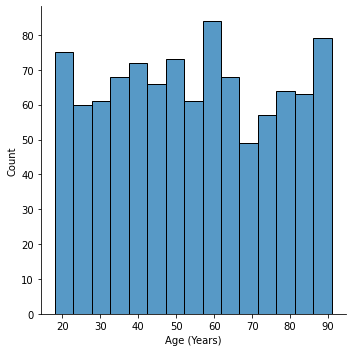

In [27]:
age_displot=sns.displot(acw_df['Age (Years)'], bins=15)
print(type(age_displot))

# 2B.

<class 'seaborn.axisgrid.FacetGrid'>


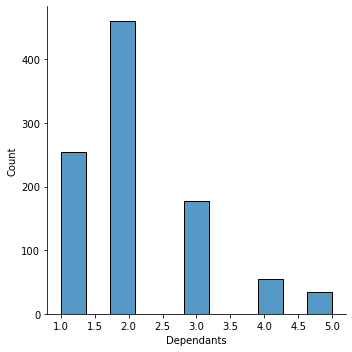

In [28]:
dependants_displot=sns.displot(data=acw_df,x='Dependants')
print(type(dependants_displot))

# 2C.

<class 'seaborn.axisgrid.FacetGrid'>


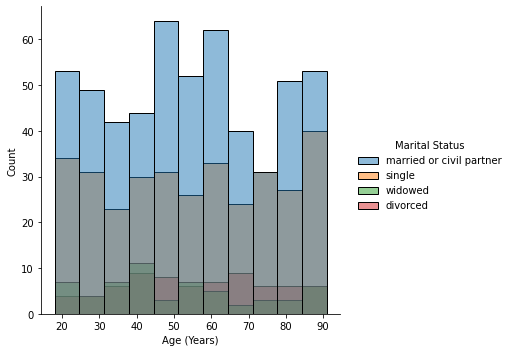

In [29]:
age_cond_displot=sns.displot(data=acw_df, x='Age (Years)', hue='Marital Status')
print(type(age_cond_displot))

# 

# EXERCISE 3- MULTIVARIATE PLOTS

# 3A.

<class 'matplotlib.axes._subplots.AxesSubplot'>


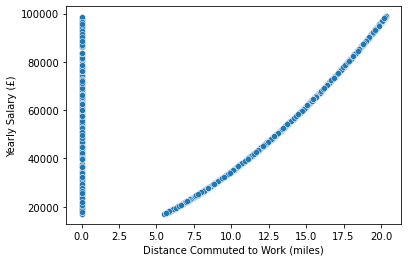

In [30]:
scatter_handle=sns.scatterplot(data=acw_df, x='Distance Commuted to Work (miles)', y='Yearly Salary (£)')
print(type(scatter_handle))

# 3B.

<class 'matplotlib.axes._subplots.AxesSubplot'>


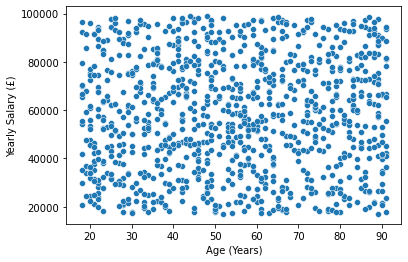

In [31]:
scatter_plt=sns.scatterplot(data=acw_df, x='Age (Years)', y='Yearly Salary (£)')
print(type(scatter_plt))

# 3C.

<class 'matplotlib.axes._subplots.AxesSubplot'>


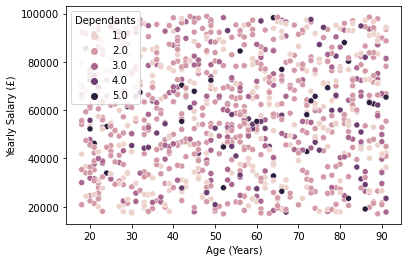

In [32]:
scatter_cond_plt=sns.scatterplot(data=acw_df, x='Age (Years)', y='Yearly Salary (£)', hue='Dependants')
print(type(scatter_cond_plt))

# 

# EXERCISE 4.

In [33]:
age_displot.savefig('Displot 1.png')
dependants_displot.savefig('Displot 2.png')
age_cond_displot.savefig('Displot 3.png')
scatter_handle.get_figure().savefig('scatter plot 1.png')
scatter_plt.get_figure().savefig('scatter plot 2.png')
scatter_cond_plt.get_figure().savefig('scatter plot 3.png')